### Carga de datos

In [1]:
import pandas as pd
import os
import numpy as np

delitos = os.path.join('..', 'data', 'IDEFC_NM_ago23.csv')
delitos_df=pd.read_csv(delitos, encoding='ISO-8859-1')
edos = os.path.join('..', 'data', 'PoblacionEstado.csv')
edos_df=pd.read_csv(edos)
geo_path = (os.path.join('..', 'data', 'mexico_edos'))

### Ajuste de tipos de datos y merge

In [2]:
edos_df['Población'] = edos_df['Población'].str.replace(',', '')
edos_df['Población'] = pd.to_numeric(edos_df['Población'], errors='coerce')

In [3]:
import geopandas as gpd

# Ruta a la carpeta que contiene los datos georeferenciados
# Leer el archivo shapefile
mexico_geo_df = gpd.read_file(geo_path)

# Haciendo las sustituciones necesarias en los nombres de los estados
mexico_geo_df['ESTADO'] = mexico_geo_df['ESTADO'].replace({
    'Coahuila': 'Coahuila de Zaragoza',
    'Veracruz': 'Veracruz de Ignacio de la Llave',
    'Distrito Federal': 'Ciudad de México',
    'Michoacán': 'Michoacán de Ocampo'
})

mexico_geo_df

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,MX11,Guanajuato,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,MX22,Querétaro,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,MX13,Hidalgo,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,MX16,Michoacán de Ocampo,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,MX15,México,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


In [8]:
months_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Agrupando delitos_df por "Entidad", "Año" y "Tipo de delito", sumando los valores mensuales
delitos_df = delitos_df.groupby(['Entidad', 'Año', 'Tipo de delito'])[months_columns].sum().reset_index()

# Mostrando las primeras filas del DataFrame agrupado
delitos_df['Tipo de delito'].unique()



array(['Aborto', 'Abuso de confianza', 'Abuso sexual', 'Acoso sexual',
       'Allanamiento de morada', 'Amenazas', 'Contra el medio ambiente',
       'Corrupción de menores', 'Daño a la propiedad',
       'Delitos cometidos por servidores públicos', 'Despojo',
       'Electorales', 'Evasión de presos', 'Extorsión', 'Falsedad',
       'Falsificación', 'Feminicidio', 'Fraude', 'Homicidio',
       'Hostigamiento sexual', 'Incesto',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Lesiones', 'Narcomenudeo', 'Otros delitos contra el patrimonio',
       'Otros delitos contra la familia',
       'Otros delitos contra la sociedad',
       'Otros delitos del Fuero Común',
       'Otros delitos que atentan contra la libertad personal',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Rapto', 'Robo', 'Secuestro', 'Trata de personas',
       'Tráfico de menores', 

In [9]:
merged_df = pd.merge(delitos_df, edos_df[['Entidad', 'Población']], on='Entidad', how='left')


tasa_delitos_final_df = delitos_df[['Entidad', 'Tipo de delito', 'Año']].copy()

# Calculando la tasa de delitos por cada 100 mil habitantes para cada mes
for month in months_columns:
    tasa_delitos_final_df[f'Tasa_{month}'] = (merged_df[month] / merged_df['Población']) * 100000

# Resultado con la tasa de delitos por cada 100 mil habitantes para cada estado, tipo de delito, año y cada mes
tasa_delitos_final_df


,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre
0,Aguascalientes,Aborto,2015,0.000000,0.210437,0.070146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070146,0.000000
1,Aguascalientes,Abuso de confianza,2015,2.875968,2.314803,2.174512,1.543202,2.525240,3.016259,2.104367,2.805822,2.805822,2.384949,3.016259,1.823785
2,Aguascalientes,Abuso sexual,2015,0.420873,0.280582,0.000000,0.140291,0.070146,0.070146,0.070146,0.070146,0.000000,0.000000,0.070146,0.070146
3,Aguascalientes,Acoso sexual,2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Aguascalientes,Allanamiento de morada,2015,0.911892,0.771601,1.262620,1.122329,1.122329,1.332766,1.262620,1.332766,1.052183,0.771601,0.280582,0.631310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,Zacatecas,Tráfico de menores,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11516,Zacatecas,Violación equiparada,2023,0.678117,0.801411,0.678117,0.554823,0.863059,1.048000,0.554823,0.554823,0.000000,0.000000,0.000000,0.000000
11517,Zacatecas,Violación simple,2023,0.431529,0.801411,1.048000,0.924706,0.678117,1.048000,0.739764,0.863059,0.000000,0.000000,0.000000,0.000000
11518,Zacatecas,Violencia de género en todas sus modalidades d...,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
final_df = pd.merge(tasa_delitos_final_df, mexico_geo_df, left_on='Entidad', right_on='ESTADO', how='left')

### Filtro 

In [102]:
# Filtrando por delito y año específicos
delito_especifico = "Feminicidio"
año_especifico = 2023

filtered_df = final_df.query("`Tipo de delito` == @delito_especifico & `Año` == @año_especifico")

filtered_df.head()

,Entidad,Tipo de delito,Año,Tasa_Enero,Tasa_Febrero,Tasa_Marzo,Tasa_Abril,Tasa_Mayo,Tasa_Junio,Tasa_Julio,Tasa_Agosto,Tasa_Septiembre,Tasa_Octubre,Tasa_Noviembre,Tasa_Diciembre,CODIGO,ESTADO,geometry
336,Aguascalientes,Feminicidio,2023,0.000000,0.000000,0.070146,0.000000,0.000000,0.070146,0.000000,0.000000,0.0,0.0,0.0,0.0,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
696,Baja California,Feminicidio,2023,0.079596,0.053064,0.053064,0.000000,0.053064,0.132660,0.000000,0.026532,0.0,0.0,0.0,0.0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1056,Baja California Sur,Feminicidio,2023,0.000000,0.000000,0.125243,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
1416,Campeche,Feminicidio,2023,0.000000,0.107716,0.107716,0.107716,0.215433,0.323149,0.215433,0.215433,0.0,0.0,0.0,0.0,MX04,Campeche,"MULTIPOLYGON (((-91.83446 18.63805, -91.84195 ..."
1776,Chiapas,Feminicidio,2023,0.018038,0.090190,0.072152,0.036076,0.108228,0.054114,0.036076,0.018038,0.0,0.0,0.0,0.0,MX05,Chiapas,"POLYGON ((-91.43750 17.24111, -91.35278 17.176..."


### Gráfica

### Cambios

In [103]:
# Creando una copia del DataFrame filtrado para evitar SettingWithCopyWarning
comparison_df = filtered_df.copy()

# Supongamos que el mes de interés es 'Abril'
mes_actual = 'Agosto'
mes_anterior = 'Julio'  # Debes determinar esto según tu mes actual

# Creando una nueva columna para la tasa del mes actual
comparison_df['Tasa_mes_actual'] = comparison_df[f'Tasa_{mes_actual}']

# Creando una nueva columna para la tasa del mes anterior
comparison_df['Tasa_mes_anterior'] = comparison_df[f'Tasa_{mes_anterior}']

# Calculando la diferencia entre los meses
comparison_df['Diferencia'] = comparison_df['Tasa_mes_actual'] - comparison_df['Tasa_mes_anterior']

# Determinando si la tasa creció o bajó
comparison_df['Cambio'] = np.where(comparison_df['Diferencia'] > 0, 'Creció', 'Bajó')

# Si la diferencia es 0, podemos asignar 'Sin Cambio'
comparison_df['Cambio'] = np.where(comparison_df['Diferencia'] == 0, 'Sin Cambio', comparison_df['Cambio'])

# Resultado: Nuevo DataFrame con la comparación
comparison_df = comparison_df[['Entidad','Tasa_mes_anterior', 'Tasa_mes_actual','Diferencia', 'Cambio']]
comparison_df


,Entidad,Tasa_mes_anterior,Tasa_mes_actual,Diferencia,Cambio
336,Aguascalientes,0.000000,0.000000,0.000000,Sin Cambio
696,Baja California,0.000000,0.026532,0.026532,Creció
1056,Baja California Sur,0.000000,0.000000,0.000000,Sin Cambio
1416,Campeche,0.215433,0.215433,0.000000,Sin Cambio
1776,Chiapas,0.036076,0.018038,-0.018038,Bajó
2136,Chihuahua,0.053449,0.106898,0.053449,Creció
2496,Ciudad de México,0.054289,0.032573,-0.021716,Bajó
2856,Coahuila de Zaragoza,0.095336,0.000000,-0.095336,Bajó
3216,Colima,0.273452,0.273452,0.000000,Sin Cambio
3576,Durango,0.054566,0.000000,-0.054566,Bajó


### Generar tweet

In [104]:
def generate_tweet(df, delito, mes_actual, mes_anterior):
    # Asegurarse de que los datos estén ordenados por la tasa del mes actual
    df = df.nlargest(5, 'Tasa_mes_actual')

    # Inicio del tweet
    tweet = f"Análisis de Seguridad México ({mes_actual} 2023)\n\n"
    tweet += f"Tasa por delito de {delito} en México (delitos cometidos por cada 100 mil habitantes):\n\n"
    tweet += "Estados con mayor tasa de delitos:\n\n"
    tweet += f"| Estado            | {mes_anterior}  | {mes_actual} |\n"
    tweet += "|-------------------|--------------|------------|\n"

    # Agregar las filas de la tabla
    for index, row in df.iterrows():
        estado = row['Entidad']
        tasa_anterior = row['Tasa_mes_anterior']
        tasa_actual = row['Tasa_mes_actual']
        cambio = '🔺' if row['Diferencia'] > 0 else '🔻'

        tweet += f"| {estado:<18} |  {tasa_anterior:.2f}     | {tasa_actual:.2f}  {cambio}   | \n"


    return tweet

# Actualización de la función para generar el tweet con los estados que más bajaron la incidencia delictiva
def generate_tweet_decrease(df, delito, mes_actual, mes_anterior):
    # Filtrar los estados donde la tasa ha disminuido (Diferencia negativa)
    df_decreased = df[df['Diferencia'] < 0]

    # Asegurarse de que los datos estén ordenados por la tasa del mes actual en orden ascendente (los que más bajaron)
    df_decreased = df_decreased.nsmallest(5, 'Diferencia')

    # Inicio del tweet
    tweet = f"Análisis de Seguridad México ({mes_actual} 2023)\n\n"
    tweet += f"Descenso en la tasa por delito de {delito} en México (delitos cometidos por cada 100 mil habitantes):\n\n"
    tweet += "Estados con mayor descenso en la tasa de delitos:\n\n"
    tweet += f"| Estado            | {mes_anterior}  | {mes_actual} |\n"
    tweet += "|-------------------|--------------|------------|\n"

    # Agregar las filas de la tabla
    for index, row in df_decreased.iterrows():
        estado = row['Entidad']
        tasa_anterior = row['Tasa_mes_anterior']
        tasa_actual = row['Tasa_mes_actual']
        cambio = '🔻'

        tweet += f"| {estado:<18} |  {tasa_anterior:.2f}     | {tasa_actual:.2f}  {cambio}   | \n"

    tweet += "\n🔺 = Aumento en la tasa\n🔻 = Disminución en la tasa"

    # Final del tweet
    

    return tweet


tweet_text = generate_tweet(comparison_df, delito_especifico, mes_actual, mes_anterior)
print(tweet_text)

tweet_text = generate_tweet_decrease(comparison_df, delito_especifico, mes_actual, mes_anterior)
print(tweet_text)


Análisis de Seguridad México (Agosto 2023)

Tasa por delito de Feminicidio en México (delitos cometidos por cada 100 mil habitantes):

Estados con mayor tasa de delitos:

| Estado            | Julio  | Agosto |
|-------------------|--------------|------------|
| Colima             |  0.27     | 0.27  🔻   | 
| Tlaxcala           |  0.15     | 0.22  🔺   | 
| Campeche           |  0.22     | 0.22  🔻   | 
| Morelos            |  0.20     | 0.20  🔻   | 
| Quintana Roo       |  0.11     | 0.16  🔺   | 

Análisis de Seguridad México (Agosto 2023)

Descenso en la tasa por delito de Feminicidio en México (delitos cometidos por cada 100 mil habitantes):

Estados con mayor descenso en la tasa de delitos:

| Estado            | Julio  | Agosto |
|-------------------|--------------|------------|
| Zacatecas          |  0.18     | 0.00  🔻   | 
| Coahuila de Zaragoza |  0.10     | 0.00  🔻   | 
| Oaxaca             |  0.07     | 0.00  🔻   | 
| Durango            |  0.05     | 0.00  🔻   | 
| Puebla     

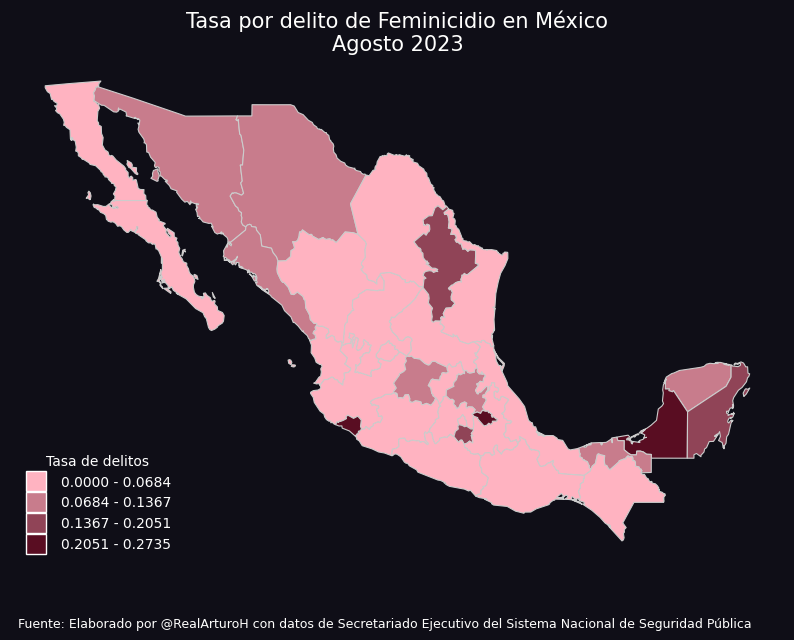

In [106]:
mexico_shapefile = mexico_geo_df
merged_map_data = mexico_shapefile.merge(filtered_df, left_on='ESTADO', right_on='Entidad', how='left')
merged_map_data_geo = gpd.GeoDataFrame(merged_map_data, geometry='geometry_y')

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

def plot_map_geo(merged_map_data, mes):
    # Obteniendo los datos para el mes seleccionado
    data = merged_map_data[f'Tasa_{mes}']

    # Creando 5 bins usando np.histogram_bin_edges
    bins = np.histogram_bin_edges(data, bins=4)

    # Redondear los bins si alguno de los valores es mayor que 1
    if any(value >= 1 for value in bins):
        bins = np.round(bins).astype(int)

    # Asignando una categoría basada en los bins
    merged_map_data[f'bins_{mes}'] = np.digitize(data, bins) - 1

    # Creando una paleta de colores con degradado desde blanco hasta rojo
    cmap = LinearSegmentedColormap.from_list('custom', ['#ffb3c1', '#590d22'], N=4)

    fig, ax = plt.subplots(figsize=(10, 8), facecolor='#0f0e17')  # Definiendo el tamaño de la figura y el color de fondo
    merged_map_data.plot(column=f'bins_{mes}', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Quitando los ejes y el recuadro
    ax.axis('off')
    ax.set_frame_on(False)

    # Creando una leyenda con cuadrados de colores y rangos automáticos
    legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cmap(i/4), markersize=15) for i in range(4)]

    # Determinar si se deben mostrar decimales en las etiquetas
    if all(value < 1 for value in bins):
        labels = [f"{bins[i]:.4f} - {bins[i + 1]:.4f}" for i in range(4)]
    else:
        labels = [f"{int(bins[i])} - {int(bins[i + 1])}" for i in range(4)]

    # Crear la leyenda (sin marco)
    legend = plt.legend(legend_elements, labels, title="Tasa de delitos", loc='lower left', frameon=False)

    # Cambiar el color de los textos dentro de la leyenda
    texts = legend.get_texts()
    for text in texts:
        text.set_color('white')

    # Cambiar el color del título de la leyenda a blanco
    title = legend.get_title()
    title.set_color('white')

    # Eliminar el delineado dentro de los cuadros de los colores
    for line in legend.get_lines():
        line.set_linewidth(0)

    plt.title(f"Tasa por delito de {delito_especifico} en México\n{mes} {año_especifico}", fontsize=15, color='#fffffe')
    plt.figtext(0.5, 0.1, 'Fuente: Elaborado por @RealArturoH con datos de Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública', ha='center', fontsize=9, color='#fffffe')

    plt.show()

# Llamada a la función con el mes deseado
plot_map_geo(merged_map_data_geo, mes='Agosto')
